# Veri Seti Hikayesi

Her bir eve ait özelliklerin ve ev fiyatlarının bulunduğu veri seti kullanılarak, farklı tipteki evlerin fiyatlarına ilişkin bir makine öğrenmesi projesi gerçekleştirilmek istenmektedir.

Ames, Lowa'daki konut evlerinden oluşan bu veri seti içerisinde 79 açıklayıcı değişken bulundurmaktadır. Veri seti bir kaggle yarışmasına ait olduğundan train ve test veri setleri oluşturulmaktadır. Test setinde ev fiyatları boş bırakılmış olup tahmin edilmek istenmektedir.


## Değişkenler

- SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalışılan hedef değişkendir.
- MSSubClass: İnşaat sınıfı
- MSZoning: Genel imar sınıflandırması
- LotFrontage: Mülkiyetin cadde ile doğrudan bağlantısının olup olmaması
- LotArea: Parsel büyüklüğü
- Street: Yol erişiminin tipi
- Alley: Sokak girişi tipi
- LotShape: Mülkün genel şekli
- LandContour: Mülkün düzlüğü
- Utulities: Mevcut hizmetlerin türü
- LotConfig: Parsel yapılandırması
- LandSlope: Mülkün eğimi
- Neighborhood: Ames şehir sınırları içindeki fiziksel konumu
- Condition1: Ana yol veya tren yoluna yakınlık
- Condition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yer varsa)
- BldgType: Konut tipi
- HouseStyle: Konut sitili
- OverallQual: Genel malzeme ve bitiş kalitesi
- OverallCond: Genel durum değerlendirmesi
- YearBuilt: Orijinal yapım tarihi
- YearRemodAdd: Yeniden düzenleme tarihi
- RoofStyle: Çatı tipi
- RoofMatl: Çatı malzemesi
- Exterior1st: Evdeki dış kaplama
- Exterior2nd: Evdeki dış kaplama (birden fazla malzeme varsa)
- MasVnrType: Duvar kaplama türü
- MasVnrArea: Kare ayaklı duvar kaplama alanı
- ExterQual: Dış malzeme kalitesi
- ExterCond: Malzemenin dışta mevcut durumu
- Foundation: Vakıf tipi
- BsmtQual: Bodrumun yüksekliği
- BsmtCond: Bodrum katının genel durumu
- BsmtExposure: Yürüyüş veya bahçe katı bodrum duvarları
- BsmtFinType1: Bodrum bitmiş alanının kalitesi
- BsmtFinSF1: Tip 1 bitmiş alanın metre karesi
- BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)
- BsmtFinSF2: Tip 2 bitmiş alanın metre karesi
- BsmtUnfSF: Bodrumun bitmemiş alanın metre karesi
- TotalBsmtSF: Bodrum alanının toplam metre karesi
- Heating: Isıtma tipi
- HeatingQC: Isıtma kalitesi ve durumu
- CentralAir: Merkezi klima
- Electrical: elektrik sistemi
- 1stFlrSF: Birinci Kat metre kare alanı
- 2ndFlrSF: İkinci kat metre kare alanı
- LowQualFinSF: Düşük kaliteli bitmiş alanlar (tüm katlar)
- GrLivArea: Üstü (zemin) oturma alanı metre karesi
- BsmtFullBath: Bodrum katındaki tam banyolar
- BsmtHalfBath: Bodrum katındaki yarım banyolar
- FullBath: Üst katlardaki tam banyolar
- HalfBath: Üst katlardaki yarım banyolar
- BedroomAbvGr: Bodrum seviyesinin üstünde yatak odası sayısı
- KitchenAbvGr: Bodrum seviyesinin üstünde mutfak Sayısı
- KitchenQual: Mutfak kalitesi
- TotRmsAbvGrd: Üst katlardaki toplam oda (banyo içermez)
- Functional: Ev işlevselliği değerlendirmesi
- Fireplaces: Şömineler
- FireplaceQu: Şömine kalitesi
- Garage Türü: Garaj yeri
- GarageYrBlt: Garajın yapım yılı
- GarageFinish: Garajın iç yüzeyi
- GarageCars: Araç kapasitesi
- GarageArea: Garajın alanı
- GarageQual: Garaj kalitesi
- GarageCond: Garaj durumu
- PavedDrive: Garajla yol arasındaki yol
- WoodDeckSF: Ayaklı ahşap güverte alanı
- OpenPorchSF: Kapı önündeki açık veranda alanı
- EnclosedPorch: Kapı önündeki kapalı veranda alan
- 3SsPorch: Üç mevsim veranda alanı
- ScreenPorch: Veranda örtü alanı
- PoolArea: Havuzun metre kare alanı
- PoolQC: Havuz kalitesi
- Fence: Çit kalitesi
- MiscFeature: Diğer kategorilerde bulunmayan özellikler
- MiscVal: Çeşitli özelliklerin değeri
- MoSold: Satıldığı ay
- YrSold: Satıldığı yıl
- SaleType: Satış Türü
- SaleCondition: Satış Durumu


In [1]:
# !pip install lightgbm
# !pip install catboost
# !pip install xgboost
# conda install -c conda-forge lightgbm
import sklearn
import seaborn as sns
import matplotlib.mlab as mlab
import torch

############ LIBRARIES ############

# BASE
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# DATA PREPROCESSING
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor

# MODELING
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# MODEL TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Veri Setinin Çekilmesi ve Birleştirilmesi


In [2]:
dfTrain = pd.read_csv('train.csv')
dfTrain.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dfTest = pd.read_csv('test.csv')
dfTest.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Train ve test setini birleştirelim

Eğer elimizdeki veri setinde birinde evlerin bilgileri, diğerinde yalnızca ID'ler ve Satış tutarları olsaydı bu iki veri setini merge ile birleştirmemiz gerekcekti. Ancak şu anda her iki veri setimizin de yapısı aynı, birini diğerininin altına getirecek şekilde birleştirmek istediğimiz için append fonksiyonunu kullanıyoruz.

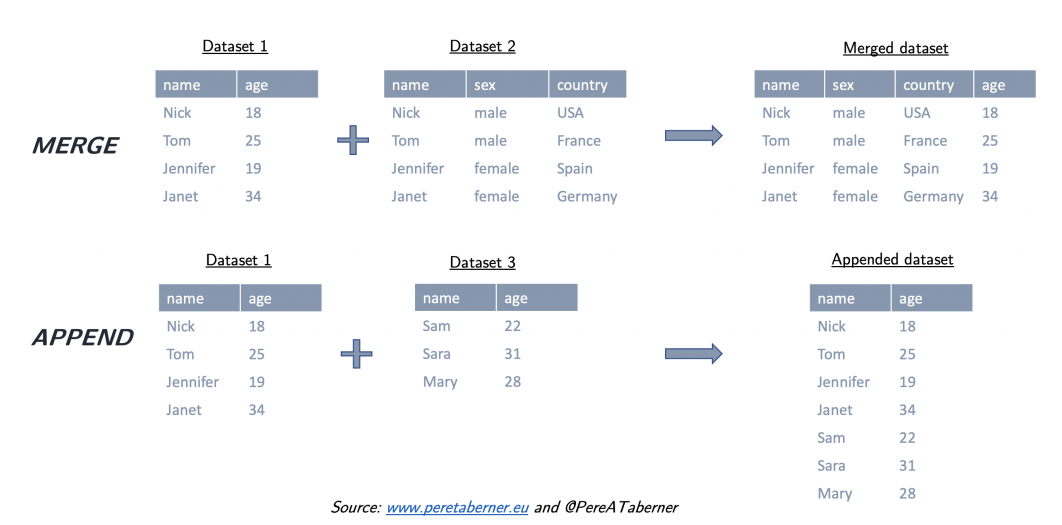


In [4]:
df = dfTrain.append(dfTest).reset_index(drop=True)
df.shape


(2919, 81)

In [5]:
df.value_counts(np.where(df["SalePrice"] > 0, '1', '0'))


1    1460
0    1459
dtype: int64

# Keşifçi Veri Analizi

Çok fazla değişkenimiz olduğu için gözle numerik ve kategorik değişkenleri yakalamamız çok zor olacağından daha önceden yazmış olduğumuz grab_col_names fonksiyonu bu veri setinde işimizi çok kolaylaştırabilir


In [6]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit


def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False


def grabColNames(dataframe, catTh=10, carTh=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)


Observations: 2919
Variables: 81
catCols: 52
numCols: 28
catButCar: 1
numButCat: 10


**Adım 2** - Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaN.
        - If 'ignore', then invalid parsing will return the input.

In [7]:
def catSummary(dataframe, colName, plot=False):
    print(pd.DataFrame({colName: dataframe[colName].value_counts(),
                        "Ratio": 100 * dataframe[colName].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[colName], data=dataframe)
        plt.show(block=True)


In [8]:
for col in catCols:
    catSummary(df, col)


         MSZoning  Ratio
RL           2265 77.595
RM            460 15.759
FV            139  4.762
RH             26  0.891
C (all)        25  0.856
##########################################
      Street  Ratio
Pave    2907 99.589
Grvl      12  0.411
##########################################
      Alley  Ratio
Grvl    120  4.111
Pave     78  2.672
##########################################
     LotShape  Ratio
Reg      1859 63.686
IR1       968 33.162
IR2        76  2.604
IR3        16  0.548
##########################################
     LandContour  Ratio
Lvl         2622 89.825
HLS          120  4.111
Bnk          117  4.008
Low           60  2.055
##########################################
        Utilities  Ratio
AllPub       2916 99.897
NoSeWa          1  0.034
##########################################
         LotConfig  Ratio
Inside        2133 73.073
Corner         511 17.506
CulDSac        176  6.029
FR2             85  2.912
FR3             14  0.480
###################

In [9]:
df[numCols].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T


,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
Id,2919.000,1460.000,842.787,1.000,146.900,292.800,730.500,1460.000,2189.500,2773.100,2889.820,2919.000
MSSubClass,2919.000,57.138,42.518,20.000,20.000,20.000,20.000,50.000,70.000,160.000,190.000,190.000
LotFrontage,2433.000,69.306,23.345,21.000,32.000,43.000,59.000,68.000,80.000,107.000,135.680,313.000
LotArea,2919.000,10168.114,7886.996,1300.000,3182.000,4922.400,7478.000,9453.000,11570.000,17142.900,33038.640,215245.000
OverallQual,2919.000,6.089,1.410,1.000,4.000,5.000,5.000,6.000,7.000,8.000,10.000,10.000
YearBuilt,2919.000,1971.313,30.291,1872.000,1915.000,1924.000,1953.500,1973.000,2001.000,2007.000,2008.000,2010.000
YearRemodAdd,2919.000,1984.264,20.894,1950.000,1950.000,1950.000,1965.000,1993.000,2004.000,2007.000,2009.000,2010.000
MasVnrArea,2896.000,102.201,179.334,0.000,0.000,0.000,0.000,0.000,164.000,466.500,771.050,1600.000
BsmtFinSF1,2918.000,441.423,455.611,0.000,0.000,0.000,0.000,368.500,733.000,1274.000,1635.320,5644.000
BsmtFinSF2,2918.000,49.582,169.206,0.000,0.000,0.000,0.000,0.000,0.000,435.000,874.660,1526.000


Id:
count   2919.000
mean    1460.000
std      842.787
min        1.000
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
100%    2919.000
max     2919.000
Name: Id, dtype: float64


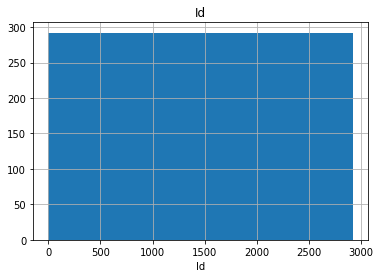

MSSubClass:
count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
100%     190.000
max      190.000
Name: MSSubClass, dtype: float64


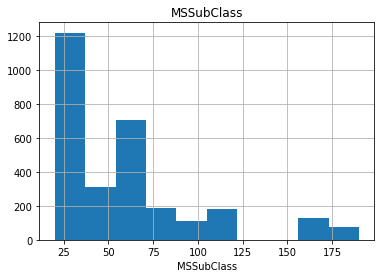

LotFrontage:
count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
100%     313.000
max      313.000
Name: LotFrontage, dtype: float64


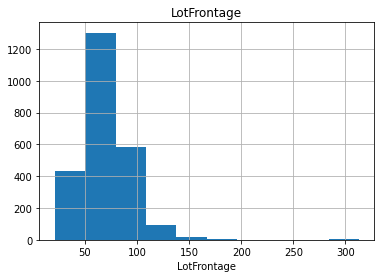

LotArea:
count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
100%    215245.000
max     215245.000
Name: LotArea, dtype: float64


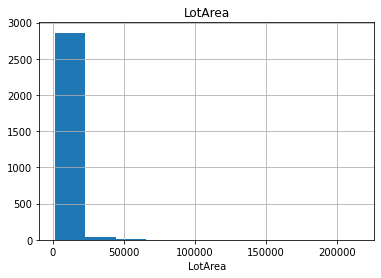

OverallQual:
count   2919.000
mean       6.089
std        1.410
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
100%      10.000
max       10.000
Name: OverallQual, dtype: float64


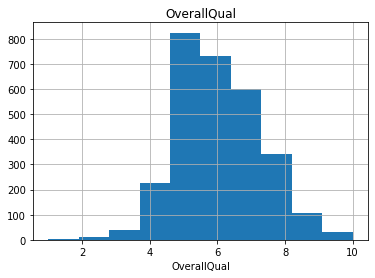

YearBuilt:
count   2919.000
mean    1971.313
std       30.291
min     1872.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
100%    2010.000
max     2010.000
Name: YearBuilt, dtype: float64


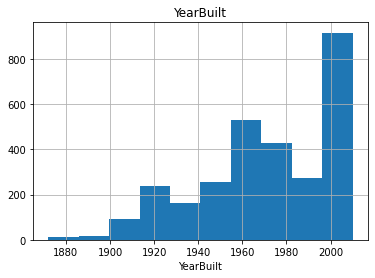

YearRemodAdd:
count   2919.000
mean    1984.264
std       20.894
min     1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
100%    2010.000
max     2010.000
Name: YearRemodAdd, dtype: float64


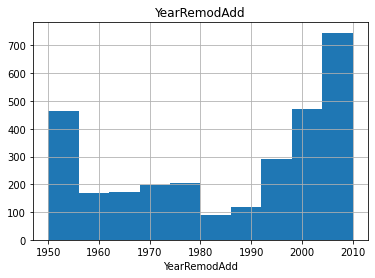

MasVnrArea:
count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
100%    1600.000
max     1600.000
Name: MasVnrArea, dtype: float64


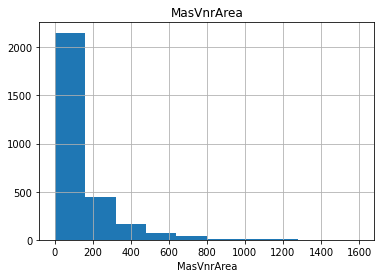

BsmtFinSF1:
count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
100%    5644.000
max     5644.000
Name: BsmtFinSF1, dtype: float64


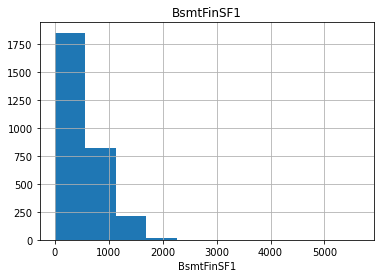

BsmtFinSF2:
count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
100%    1526.000
max     1526.000
Name: BsmtFinSF2, dtype: float64


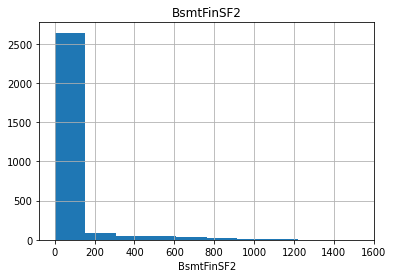

BsmtUnfSF:
count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
100%    2336.000
max     2336.000
Name: BsmtUnfSF, dtype: float64


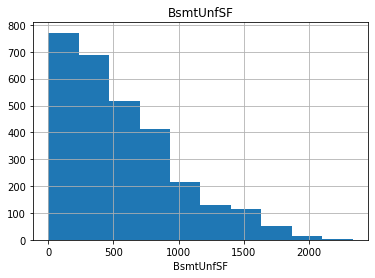

TotalBsmtSF:
count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
100%    6110.000
max     6110.000
Name: TotalBsmtSF, dtype: float64


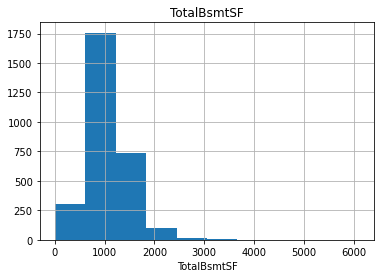

1stFlrSF:
count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
100%    5095.000
max     5095.000
Name: 1stFlrSF, dtype: float64


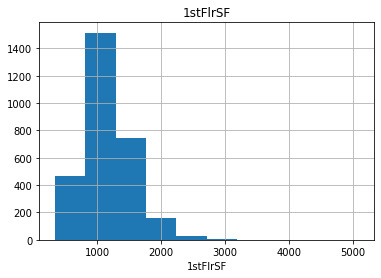

2ndFlrSF:
count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
100%    2065.000
max     2065.000
Name: 2ndFlrSF, dtype: float64


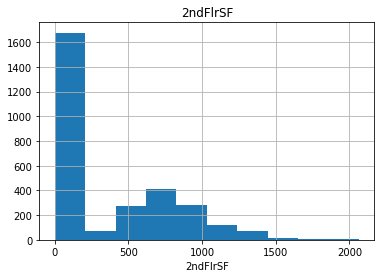

LowQualFinSF:
count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
100%    1064.000
max     1064.000
Name: LowQualFinSF, dtype: float64


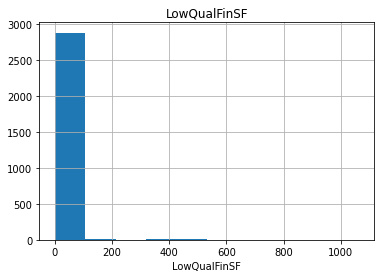

GrLivArea:
count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
100%    5642.000
max     5642.000
Name: GrLivArea, dtype: float64


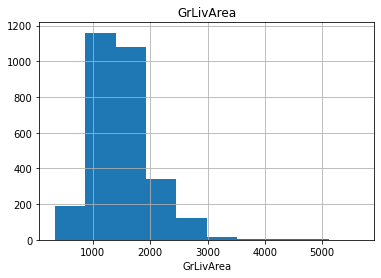

TotRmsAbvGrd:
count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
100%      15.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


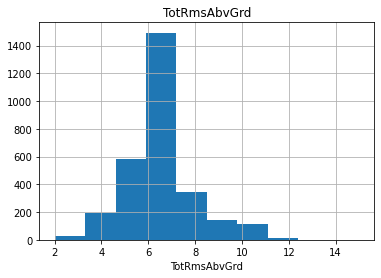

GarageYrBlt:
count   2760.000
mean    1978.113
std       25.574
min     1895.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
100%    2207.000
max     2207.000
Name: GarageYrBlt, dtype: float64


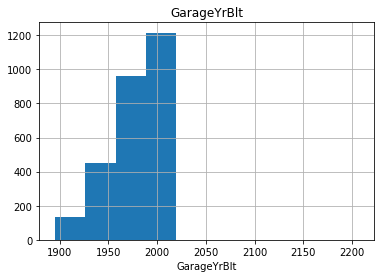

GarageArea:
count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
100%    1488.000
max     1488.000
Name: GarageArea, dtype: float64


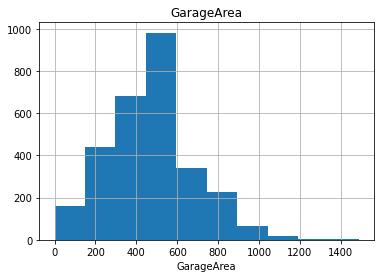

WoodDeckSF:
count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
100%    1424.000
max     1424.000
Name: WoodDeckSF, dtype: float64


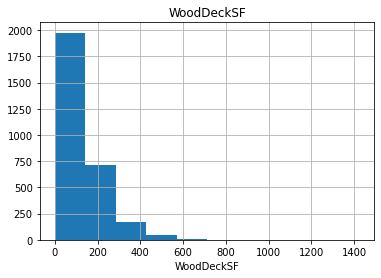

OpenPorchSF:
count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
100%     742.000
max      742.000
Name: OpenPorchSF, dtype: float64


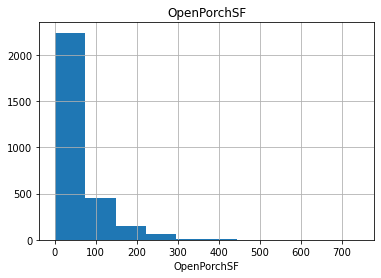

EnclosedPorch:
count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
100%    1012.000
max     1012.000
Name: EnclosedPorch, dtype: float64


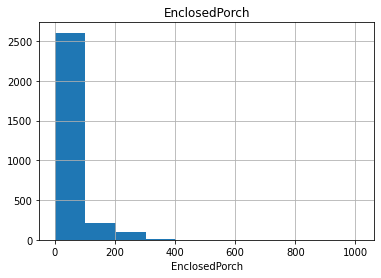

3SsnPorch:
count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
100%     508.000
max      508.000
Name: 3SsnPorch, dtype: float64


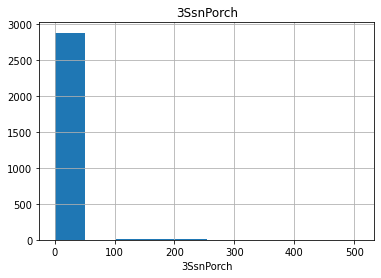

ScreenPorch:
count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
100%     576.000
max      576.000
Name: ScreenPorch, dtype: float64


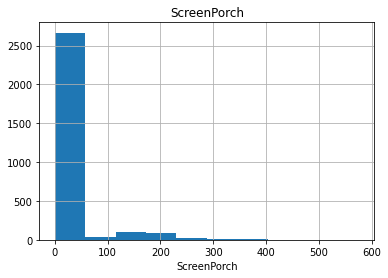

PoolArea:
count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
100%     800.000
max      800.000
Name: PoolArea, dtype: float64


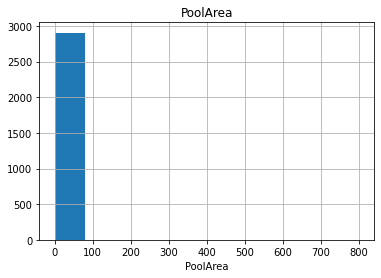

MiscVal:
count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
100%    17000.000
max     17000.000
Name: MiscVal, dtype: float64


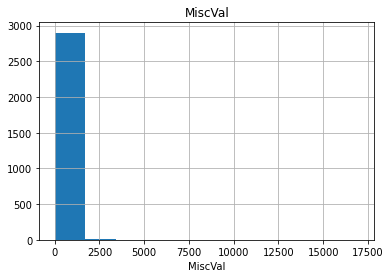

MoSold:
count   2919.000
mean       6.213
std        2.715
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
100%      12.000
max       12.000
Name: MoSold, dtype: float64


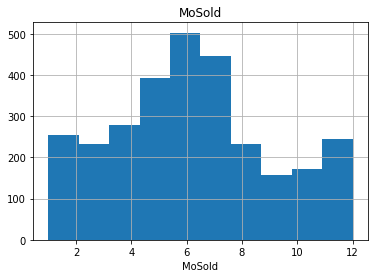

SalePrice:
count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
100%    755000.000
max     755000.000
Name: SalePrice, dtype: float64


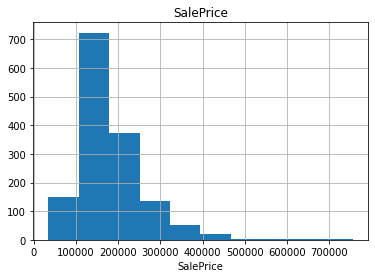

In [10]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4,
                 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)

    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)


for col in numCols:
    print(f"{col}:")
    numSummary(df, col, True)


# Bağımlı değişkenin incelenmesi


In [11]:
df["SalePrice"].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]).T


count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
25%     129975.000
50%     163000.000
75%     214000.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64

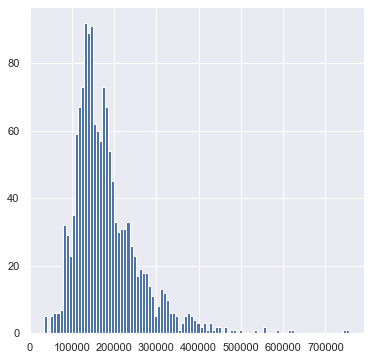

In [12]:
sns.set(rc={'figure.figsize': (6, 6)})
df["SalePrice"].hist(bins=100)
plt.show()


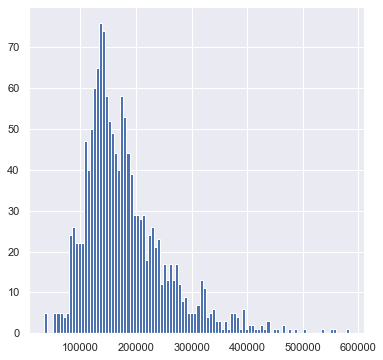

In [13]:
df = df.loc[~(df.SalePrice > 600000), ]
df["SalePrice"].hist(bins=100)
plt.show()


In [14]:
print("Çarpıklık: %f" % df['SalePrice'].skew())


Çarpıklık: 1.427011


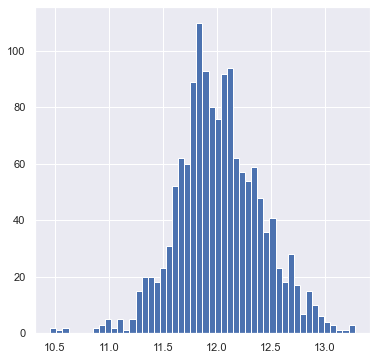

In [15]:
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()


In [16]:
print("Çarpıklık: %f" % np.log1p(df['SalePrice']).skew())


Çarpıklık: 0.029134


# Korelasyon İncelemesi


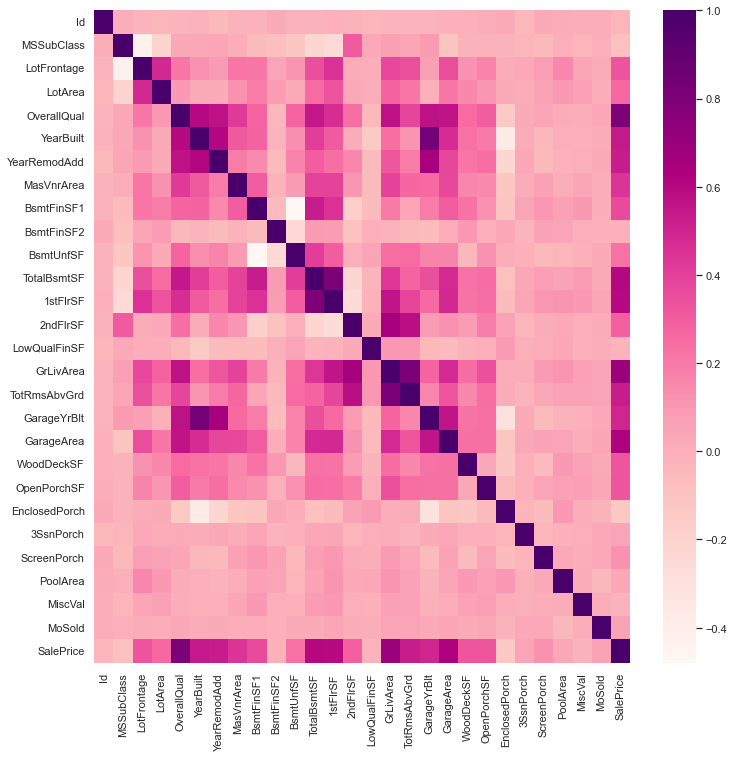

In [17]:
corr = df[numCols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdPu")
plt.show(block=True)


In [18]:
def highCorrelatedCols(dataframe, plot=False, corrTh=0.70):
    corr = dataframe.corr()
    corMatrix = corr.abs()
    upperTriangleMatrix = corMatrix.where(
        np.triu(np.ones(corMatrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upperTriangleMatrix.columns if any(
        upperTriangleMatrix[col] > corrTh)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list


highCorrelatedCols(df, plot=False)


['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

# Aykırı gözlem analizi


In [19]:
# Aykırı değerlerin baskılanması
def outlierThresholds(dataframe, variable, lowQuantile=0.10, upQuantile=0.90):
    quantileOne = dataframe[variable].quantile(lowQuantile)
    quantileThree = dataframe[variable].quantile(upQuantile)
    interquantile_range = quantileThree - quantileOne
    upLimit = quantileThree + 1.5 * interquantile_range
    lowLimit = quantileOne - 1.5 * interquantile_range
    return lowLimit, upLimit

# Aykırı değer kontrolü


def checkOutlier(dataframe, col_name):
    lowLimit, upLimit = outlierThresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upLimit) | (dataframe[col_name] < lowLimit)].any(axis=None):
        return True
    else:
        return False

# Aykırı değerlerin baskılanması


def replaceWithThresholds(dataframe, variable):
    lowLimit, upLimit = outlierThresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < lowLimit), variable] = lowLimit
    dataframe.loc[(dataframe[variable] > upLimit), variable] = upLimit


In [20]:
for col in numCols:
    if col != "SalePrice":
        print(col, checkOutlier(df, col))


Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False


In [21]:
for col in numCols:
    if col != "SalePrice":
        replaceWithThresholds(df, col)


# Eksik Değer Analizi


In [22]:
def missingValuesTable(dataframe, naName=False):
    naColums = [
        col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    nMiss = dataframe[naColums].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[naColums].isnull().sum() /
             dataframe.shape[0] * 100).sort_values(ascending=False)
    missingDf = pd.concat([nMiss, np.round(ratio, 2)],
                          axis=1, keys=['n_miss', 'ratio'])
    print(missingDf, end='\n')
    if naName:
        return naColums


missingValuesTable(df)


              n_miss  ratio
PoolQC          2906 99.690
MiscFeature     2810 96.400
Alley           2717 93.210
Fence           2345 80.450
SalePrice       1459 50.050
FireplaceQu     1420 48.710
LotFrontage      486 16.670
GarageCond       159  5.450
GarageYrBlt      159  5.450
GarageFinish     159  5.450
GarageQual       159  5.450
GarageType       157  5.390
BsmtExposure      82  2.810
BsmtCond          82  2.810
BsmtQual          81  2.780
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
Functional         2  0.070
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
Utilities          2  0.070
KitchenQual        1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030
Exterior2nd        1  0.030
Exterior1st        1  0.030
SaleType           1  0.030
Electrical         1

In [23]:
noCols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
          "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]


# Kolonlardaki boşlukların "No" ifadesi ile doldurulması
for col in noCols:
    df[col].fillna("No", inplace=True)

missingValuesTable(df)


              n_miss  ratio
SalePrice       1459 50.050
LotFrontage      486 16.670
GarageYrBlt      159  5.450
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Utilities          2  0.070
Exterior2nd        1  0.030
BsmtFinSF1         1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
Exterior1st        1  0.030
Electrical         1  0.030
KitchenQual        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
SaleType           1  0.030
TotalBsmtSF        1  0.030


In [24]:
df.shape


(2915, 81)

In [25]:
# Bu fonsksiyon eksik değerlerin median veya mean ile doldurulmasını sağlar
def quickMissingImp(data, numMethod="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if
                         data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    tempTarget = data[target]

    print("# BEFORE")
    # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı
    print(data[variables_with_na].isnull().sum(), "\n\n")

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x,
                      axis=0)

    # numMethod mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if numMethod == "mean":
        data = data.apply(lambda x: x.fillna(x.mean())
                          if x.dtype != "O" else x, axis=0)
    # numMethod median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif numMethod == "median":
        data = data.apply(lambda x: x.fillna(x.median())
                          if x.dtype != "O" else x, axis=0)

    data[target] = tempTarget

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + numMethod.upper() +
          "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quickMissingImp(df, numMethod="median", cat_length=17)


# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

# Feature Engineering

**Rare yapılacaklar:** MSZoning, LotShape, ExterCond, GarageQual, BsmtFinType2 , Condition1 , BldgType

**Çıkartılacaklar:** Street, Alley, LandContour, Utilities, LandSlope, Condition2, Heating, CentralAir, Functional, PoolQC, MiscFeature, Neighborhood, KitchenAbvGr


In [26]:
def rareAnalyser(dataframe, target, catCols):
    for col in catCols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


rareAnalyser(df, "SalePrice", catCols)


MSZoning : 5
         COUNT  RATIO  TARGET_MEAN
C (all)     25  0.009    74528.000
FV         139  0.048   214014.062
RH          26  0.009   131558.375
RL        2265  0.777   189285.172
RM         460  0.158   126316.830


Street : 2
      COUNT  RATIO  TARGET_MEAN
Grvl     12  0.004   130190.500
Pave   2903  0.996   179742.859


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2717  0.932   181984.843
Pave     78  0.027   168000.585


LotShape : 4
     COUNT  RATIO  TARGET_MEAN
IR1    964  0.331   202117.810
IR2     76  0.026   239833.366
IR3     16  0.005   216036.500
Reg   1859  0.638   164754.818


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk    117  0.040   143104.079
HLS    120  0.041   231533.940
Low     60  0.021   203661.111
Lvl   2618  0.898   178641.343


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   2914  1.000   179567.553
NoSeWa      1  0.000   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     509  

_MSZoning_ değişkeni

Yaşam alanının Zone'unu belirtmektedir. Residential High grubu az olduğu için ile Residential Medium ile birleştirebiliriz.
Diğer iki grubun sayıları düşük olduğu için daha anlamlı hale gelebilmesi adına bir araya getirebiliriz.


In [27]:
df["MSZoning"].value_counts()


RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [28]:
df.loc[(df["MSZoning"] == "RH"), "MSZoning"] = "RM"
df.loc[(df["MSZoning"] == "FV"), "MSZoning"] = "FV + C (all)"
df.loc[(df["MSZoning"] == "C (all)"), "MSZoning"] = "FV + C (all)"
df["MSZoning"].value_counts()


RL              2265
RM               486
FV + C (all)     164
Name: MSZoning, dtype: int64

_Lot Area_ değişkeni

Evin ft2'sini göstermektedir. 200K ya kadar değer vardır ancak çoğunluk alt değerlerde olduğundan bizim için anlam yaratabilmesi için gruplandırabiliriz.


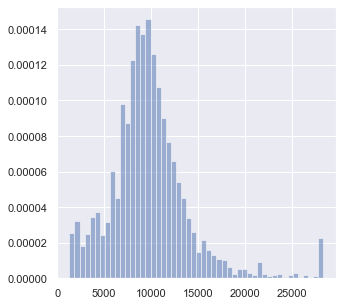

In [29]:
sns.set(rc={'figure.figsize': (5, 5)})
bins = 50
plt.hist(df["LotArea"], bins, alpha=0.5, density=True)
plt.show()


In [30]:
df["LotArea"].max()


28300.699999999997

In [31]:
df['LotArea'].mean()


9803.829914236707

In [32]:
New_LotArea = pd.Series(
    ["Studio", "Small", "Middle", "Large", "Dublex", "Luxury"], dtype="category")
df["New_LotArea"] = New_LotArea
df.loc[(df["LotArea"] <= 2000), "New_LotArea"] = New_LotArea[0]
df.loc[(df["LotArea"] > 2000) & (df["LotArea"] <= 4000),
       "New_LotArea"] = New_LotArea[1]
df.loc[(df["LotArea"] > 4000) & (df["LotArea"] <= 6000),
       "New_LotArea"] = New_LotArea[2]
df.loc[(df["LotArea"] > 6000) & (df["LotArea"] <= 8000),
       "New_LotArea"] = New_LotArea[3]
df.loc[(df["LotArea"] > 10000) & (df["LotArea"] <= 12000),
       "New_LotArea"] = New_LotArea[4]
df.loc[df["LotArea"] > 12000, "New_LotArea"] = New_LotArea[5]


In [33]:
df["New_LotArea"].value_counts()


Luxury    620
Dublex    594
Large     463
Middle    216
Small     157
Studio     58
Name: New_LotArea, dtype: int64

_LotShape_ değişkeni

Mülkün genel şeklini göstermektedir. 4 tane grubu olmasından da bizim için reg ve IR olarak iki grubu olması yeterlidir.

- Reg Regular
- IR1 Slightly irregular
- IR2 Moderately Irregular
- IR3 Irregular


In [34]:
df["LotShape"].value_counts()


Reg    1859
IR1     964
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [35]:
df.loc[(df["LotShape"] == "IR1"), "LotShape"] = "IR"
df.loc[(df["LotShape"] == "IR2"), "LotShape"] = "IR"
df.loc[(df["LotShape"] == "IR3"), "LotShape"] = "IR"


In [36]:
df["LotShape"].value_counts()


Reg    1859
IR     1056
Name: LotShape, dtype: int64

_ExterCond:_ değişkeni

Malzemenin dış cephedeki durumunu vermektedir

-     Ex	Excellent
-     Gd	Good
-     TA	Average/Typical
-     Fa	Fair
-     Po	Poor


In [37]:
df["ExterCond"].value_counts()


TA    2535
Gd     298
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [38]:
df["ExterCond"] = np.where(df.ExterCond.isin(
    ["Fa", "Po"]), "FaPo", df["ExterCond"])
df["ExterCond"] = np.where(df.ExterCond.isin(
    ["Ex", "Gd"]), "ExGd", df["ExterCond"])
df['ExterCond'].value_counts()


TA      2535
ExGd     310
FaPo      70
Name: ExterCond, dtype: int64

_GarageQual_ değişkeni

Garajın kalitesini göstermektedir.

-     Ex	Excellent
-     Gd	Good
-     TA	Typical/Average
-     Fa	Fair
-     Po	Poor
-     NA	No Garage


In [39]:
df['GarageQual'].value_counts()


TA    2600
No     159
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [40]:
df["GarageQual"] = np.where(df.GarageQual.isin(
    ["Fa", "Po"]), "FaPo", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(
    ["Ex", "Gd"]), "ExGd", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(
    ["ExGd", "TA"]), "ExGd", df["GarageQual"])
df['GarageQual'].value_counts()


ExGd    2627
No       159
FaPo     129
Name: GarageQual, dtype: int64

_BsmtFinType1 ve BsmtFinType2_ değişkeni

Birinci ve ikinci bodrumun bitmiş bölümünün kalitesi

-     GLQ	Good Living Quarters
-     ALQ	Average Living Quarters
-     BLQ	Below Average Living Quarters
-     Rec	Average Rec Room
-     LwQ	Low Quality
-     Unf	Unfinshed
-     NA	No Basement


In [41]:
df['BsmtFinType1'].value_counts()


Unf    851
GLQ    845
ALQ    429
Rec    288
BLQ    269
LwQ    154
No      79
Name: BsmtFinType1, dtype: int64

In [42]:
df['BsmtFinType2'].value_counts()


Unf    2489
Rec     105
LwQ      87
No       80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [43]:
df["BsmtFinType1"] = np.where(df.BsmtFinType1.isin(
    ["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType1"])
df["BsmtFinType1"] = np.where(df.BsmtFinType1.isin(
    ["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType1"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(
    ["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType2"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(
    ["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType2"])
df['BsmtFinType1'].value_counts()


RareExcellent    1274
Unf               851
RareGood          711
No                 79
Name: BsmtFinType1, dtype: int64

In [44]:
df['BsmtFinType2'].value_counts()


Unf              2489
RareGood          260
RareExcellent      86
No                 80
Name: BsmtFinType2, dtype: int64

_Condition1_ değişkeni

Anayola ya da demiryoluna yakınlığı göstermektedir. Bitişik olanları bir grup, normali bir grup ve diğerlerini mesafeli olduğu için bir grup yapabiliriz

- Artery Adjacent to arterial street
- Feedr Adjacent to feeder street
- Norm Normal
- RRNn Within 200' of North-South Railroad
- RRAn Adjacent to North-South Railroad
- PosN Near positive off-site feature--park, greenbelt, etc.
- PosA Adjacent to postive off-site feature
- RRNe Within 200' of East-West Railroad
- RRAe Adjacent to East-West Railroad


In [45]:
df['Condition1'].value_counts()


Norm      2507
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [46]:
df.loc[(df["Condition1"] == "Feedr") | (df["Condition1"] == "Artery") | (df["Condition1"] == "RRAn") | (
    df["Condition1"] == "PosA") | (df["Condition1"] == "RRAe"), "Condition1"] = "AdjacentCondition"
df.loc[(df["Condition1"] == "RRNn") | (df["Condition1"] == "PosN") |
       (df["Condition1"] == "RRNe"), "Condition1"] = "WithinCondition"
df.loc[(df["Condition1"] == "Norm"), "Condition1"] = "NormalCondition"
df['Condition1'].value_counts()


NormalCondition      2507
AdjacentCondition     354
WithinCondition        54
Name: Condition1, dtype: int64

In [47]:
df['Condition2'].value_counts()


Norm      2885
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [48]:
df.drop('Condition2', axis=1, inplace=True)


_BldgType_ değişkeni

Binanın türünü vermektedir

-     1Fam	Single-family Detached	-> Tek aile
-     2FmCon	Two-family Conversion; originally built as one-family dwelling -> Aslında tek aile
-     Duplx	Duplex
-     TwnhsE	Townhouse End Unit
-     TwnhsI	Townhouse Inside Unit


In [49]:
df['BldgType'].value_counts()


1Fam      2421
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [50]:
df["BldgType"] = np.where(df.BldgType.isin(
    ["1Fam", "2fmCon"]), "Normal", df["BldgType"])
df["BldgType"] = np.where(df.BldgType.isin(
    ["TwnhsE", "Twnhs", "Duplex"]), "Big", df["BldgType"])
df['BldgType'].value_counts()


Normal    2483
Big        432
Name: BldgType, dtype: int64

_TotalQual_ değişkeni

Kaliteyi gösteren değişkenlerle toplam bir kalite göstergesi değişkeni oluşturalım


In [51]:
df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis=1)


*Overall* değişkeni

Evin genel durumu ve kullanılan materyallerin kalitesinden bir değişken oluşturalım


In [52]:
df["Overall"] = df[["OverallQual", "OverallCond"]].sum(axis = 1)

*NEW_TotalFlrSF* değişkeni

Evin toplamdaki kapladığı yüzey alanı

In [53]:
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

*NEW_PorchArea* değişkeni

Ev dışında kalan alan toplamı


In [54]:
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

*NEW_TotalHouseArea* değişkeni

Evin toplam alanı

In [55]:
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

*NEW_TotalSqFeet* değişkeni

Evin toplam kapladığı ft2

In [56]:
df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF

*NEW_TotalFullBath* ve *NEW_TotalHalfBath* değişkenleri

Ev içerisindeki topla yarım ve tam banyo sayıları

In [57]:
df["NEW_TotalFullBath"] = df.BsmtFullBath + df.FullBath
df["NEW_TotalHalfBath"] = df.BsmtHalfBath + df.HalfBath

*NEW_TotalBath* değişkeni

Ev içerisinde bulunan toplam banyo sayısını ifade etmektedir

In [58]:
df["NEW_TotalBath"] = df["NEW_TotalFullBath"] + (df["NEW_TotalHalfBath"]*0.5)

*Lot Ratio* değişkenleri

Yaşanan alan, toplam ev alanı ve garaj alanının arazinin ne kadarını kapladığı

In [59]:
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

*Tarihler arasındaki farklar* değişkenleri

Restorasyon ile yapım yılı arasında geçen yıl, Garajın yapım yılıyla evin yapım yılı arasındaki fark gibi değişkenler

In [60]:
df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt

In [61]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,New_LotArea,TotalQual,Overall,NEW_TotalFlrSF,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalFullBath,NEW_TotalHalfBath,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1.000,60,RL,65.000,8450.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,NormalCondition,Normal,2Story,7.000,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,RareExcellent,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856.000,854.000,0,1710.000,1.000,0.000,2,1,3,1,Gd,8.000,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,ExGd,TA,Y,0,61.000,0,0,0,0,No,No,No,0,2.000,2008,WD,Normal,208500.000,Studio,12.000,12.000,1710.000,61.000,2566.000,2566.000,3.000,1.000,3.500,0.202,0.304,0.065,0,5,5,0.000,0.000,5.000
1,2.000,20,RL,80.000,9600.000,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,AdjacentCondition,Normal,1Story,6.000,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,RareExcellent,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262.000,0.000,0,1262.000,0.000,1.000,2,0,3,1,TA,6.000,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,ExGd,TA,Y,298,0.000,0,0,0,0,No,No,No,0,5.000,2007,WD,Normal,181500.000,Small,14.000,14.000,1262.000,298.000,2524.000,2524.000,2.000,1.000,2.500,0.131,0.263,0.048,0,31,31,0.000,0.000,31.000
2,3.000,60,RL,68.000,11250.000,Pave,No,IR,Lvl,AllPub,Inside,Gtl,CollgCr,NormalCondition,Normal,2Story,7.000,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,RareExcellent,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920.000,866.000,0,1786.000,1.000,0.000,2,1,3,1,Gd,6.000,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,ExGd,TA,Y,0,42.000,0,0,0,0,No,No,No,0,9.000,2008,WD,Normal,223500.000,Dublex,12.000,12.000,1786.000,42.000,2706.000,2706.000,3.000,1.000,3.500,0.159,0.241,0.054,1,7,6,0.000,1.000,7.000
3,4.000,70,RL,60.000,9550.000,Pave,No,IR,Lvl,AllPub,Corner,Gtl,Crawfor,NormalCondition,Normal,2Story,7.000,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,RareExcellent,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961.000,756.000,0,1717.000,1.000,0.000,1,0,3,1,Gd,7.000,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,ExGd,TA,Y,0,35.000,272,0,0,0,No,No,No,0,2.000,2006,WD,Abnorml,140000.000,Large,12.000,12.000,1717.000,307.000,2473.000,2473.000,2.000,0.000,2.000,0.180,0.259,0.067,55,91,36,83.000,28.000,8.000
4,5.000,60,RL,84.000,14260.000,Pave,No,IR,Lvl,AllPub,FR2,Gtl,NoRidge,NormalCondition,Normal,2Story,8.000,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,RareExcellent,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145.000,1053.000,0,2198.000,1.000,0.000,2,1,4,1,Gd,9.000,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,ExGd,TA,Y,192,84.000,0,0,0,0,No,No,No,0,12.000,2008,WD,Normal,250000.000,Luxury,13.000,13.000,2198.000,276.000,3343.000,3343.000,3.000,1.000,3.500,0.154,0.234,0.059,0,8,8,0.000,0.000,8.000


In [62]:
dropList = ["Street", "Alley", "LandContour", "Utilities" ,"LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood","KitchenAbvGr", "CentralAir", "Functional"]

# dropList'teki değişkenlerin düşürülmesi
df.drop(dropList, axis=1, inplace=True)

# Encoding Islemleri

In [64]:
catCols, catButCar, numButCat = grabColNames(df)

Observations: 2915
Variables: 87
catCols: 48
numCols: 39
catButCar: 0
numButCat: 17


In [65]:
def labelEncoder(dataframe, binaryCol):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[binaryCol] = labelencoder.fit_transform(dataframe[binaryCol])
    return dataframe

binaryCols = [col for col in df.columns if df[col].dtypes == "O"
               and len(df[col].unique()) == 2]

for col in binaryCols:
    labelEncoder(df, col)

In [66]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, catCols, drop_first=True)

# Modelleme

In [67]:
missingValuesTable(df)

           n_miss  ratio
SalePrice    1459 50.050


In [68]:
# Log dönüşümünün gerçekleştirilmesi
trainDf = df[df['SalePrice'].notnull()]
testDf = df[df['SalePrice'].isnull()].drop("SalePrice", axis=1)

y = np.log1p(df[df['SalePrice'].notnull()]['SalePrice'])
X = trainDf.drop(["Id", "SalePrice"], axis=1)

In [69]:
# Verinin eğitim ve tet verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.165 (LR) 
RMSE: 0.1474 (Ridge) 
RMSE: 0.1835 (Lasso) 
RMSE: 0.1769 (ElasticNet) 
RMSE: 0.2127 (KNN) 
RMSE: 0.2005 (CART) 
RMSE: 0.1406 (RF) 
RMSE: 0.1958 (SVR) 
RMSE: 0.1297 (GBM) 
RMSE: 0.1407 (XGBoost) 
RMSE: 0.1336 (LightGBM) 


In [70]:
xgboostModel = XGBRegressor(objective='reg:squarederror')

rmse = np.mean(np.sqrt(-cross_val_score(xgboostModel,
                                        X, y, cv=5, scoring="neg_mean_squared_error")))


xgboostParams = {"learning_rate": [0.1, 0.01, 0.03],
                  "max_depth": [5, 6, 8],
                  "n_estimators": [100, 200, 300],
                  "colsampleBytree": [0.5, 0.8, 1]}

xgboostGsBest = GridSearchCV(xgboostModel,
                            xgboostParams,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[10:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsampleBytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [71]:
xgboostGsBest.best_params_

{'colsampleBytree': 0.5,
 'learning_rate': 0.03,
 'max_depth': 5,
 'n_estimators': 300}

In [74]:
finalModel = xgboostModel.set_params(**xgboostGsBest.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(finalModel, X, y, cv=5, scoring="neg_mean_squared_error")))

[10:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsampleBytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsampleBytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsampleBytree" } might not be use

In [73]:
round(rmse, 4)

0.13

# Modelin Test Edilmesi

In [75]:
xgboostTuned = XGBRegressor(objective='reg:squarederror',**xgboostGsBest.best_params_).fit(X_train, y_train)
y_pred = xgboostTuned.predict(X_test)


# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y= np.expm1(y_pred)
new_y_test= np.expm1(y_test)

np.sqrt(mean_squared_error(new_y_test, new_y))

# RMSE : 23535.96597150668

[10:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsampleBytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




24531.094836910004

In [76]:
df['SalePrice'].mean()

179538.66002747254

In [77]:
testDf.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,TotalQual,Overall,NEW_TotalFlrSF,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,LotShape_1,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_NormalCondition,Condition1_WithinCondition,BldgType_1,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_FaPo,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_RareExcellent,BsmtFinType1_RareGood,BsmtFinType1_Unf,BsmtFinType2_RareExcellent,BsmtFinType2_RareGood,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_FaPo,GarageQual_No,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,New_LotArea_Large,New_LotArea_Luxury,New_LotArea_Middle,New_LotArea_Small,New_LotArea_Studio,NEW_TotalFullBath_1.0,NEW_TotalFullBath_2.0,NEW_TotalFullBath_3.0,NEW_TotalFullBath_4.0,NEW_TotalFullBath_6.0,NEW_TotalHalfBath_1.0,NEW_TotalHalfBath_2.0,NEW_TotalHalfBath_3.0,NEW_TotalHalfBath_4.0
1460,1461.000,20,80.000,11622.000,5.000,1961,1961,0.000,468.000,144.000,270.000,882.000,896.000,0.000,896.000,5.000,1961.000,730.000,140,0.000,0,6.000,11.000,11.000,896.000,140.000,1778.000,1778.000,1.000,0.077,0.153,0.063,0,49,49,0.000,0.000,49.000,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,

In [78]:
submissionDf = pd.DataFrame()
submissionDf['Id'] = testDf["Id"].astype("Int32")

y_pred_sub = xgboostTuned.predict(testDf.drop("Id", axis=1))

y_pred_sub = np.expm1(y_pred_sub)

submissionDf['SalePrice'] = y_pred_sub

submissionDf.to_csv('submission.csv', index=False)